In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#设置随机数种子
np.random.seed(5)#

In [29]:
x_data = np.linspace(-1,1,100)
#y = 2x+1
y_data = 2*x_data +1.0+ np.random.randn(*x_data.shape)*0.4 # 不理解*x_data.shape的含义

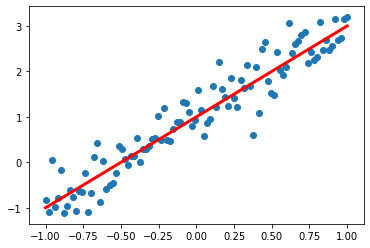

In [30]:
plt.scatter(x_data,y_data)
plt.plot(x_data,2*x_data+1.0,color='red',linewidth=3)

In [31]:
#定义训练数据的占位符，x是特征，y是标签值
x=tf.placeholder('float', name='x')
y=tf.placeholder('float', name='y')

In [32]:
#定义模型函数
def model(x, w, b):
    return tf.multiply(x,w)+b

In [33]:
#定义模型结构
w = tf.Variable(1.0, name='w0')
b = tf.Variable(0.0, name='b')
pred = model(x, w, b)

In [34]:
#设置训练参数
train_epochs = 5
learning_rate = 0.05
#定义损失函数;  常见的损失函数：均方差和交叉熵
loss_function = tf.reduce_mean(tf.square(y-pred))
#定义优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

Train Epoch: 02 Step: 002 loss= 0.052370854
Train Epoch: 04 Step: 004 loss= 0.048365295
w: 1.9822522
b: 1.0420525


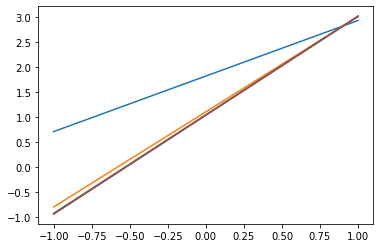

In [51]:
w_f = 1
b_f = 0
step = 0 
display_step = 2
loss_list = []
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(train_epochs):
        for xs,ys in zip(x_data,y_data):
            _, loss = sess.run([optimizer, loss_function], feed_dict={x:xs, y:ys})
        loss_list.append(loss)#分为随机梯度下降SGB 和 Batch SGD
        step = step +1
        if step % display_step ==0:
            print('Train Epoch:', '%02d' % (epoch+1), 'Step: %03d' % (step), 'loss=', '{:.9f}'.format(loss))
        b0temp = b.eval(session=sess)
        w0temp = w.eval(session=sess)
        plt.plot(x_data, w0temp*x_data+b0temp)
    w_f = sess.run(w)
    b_f = sess.run(b)
    print('w:',sess.run(w))
    print('b:',sess.run(b))
    plt.plot(x_data, w0temp*x_data+b0temp)


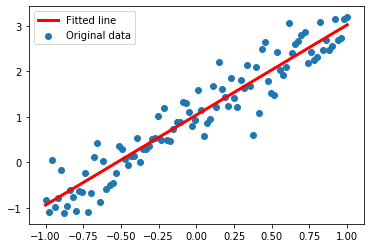

In [52]:
#结果的可视化
with tf.Session() as sess:
    #print(sess.run(w))
    #print(sess.run(b))
    plt.scatter(x_data,y_data,label='Original data')
    plt.plot(x_data, x_data*w_f+b_f, label='Fitted line', color='r', linewidth=3)
    plt.legend(loc=2)

In [53]:
#利用模型进行预测
with tf.Session() as sess:
    x_test = 3.21
    predict = sess.run(pred, feed_dict={x:x_test,w:w_f, b:b_f})
    print('predict value:', predict)
    target = 2*x_test + 1.0
    print('target:', target)

predict value: 7.4050827
target: 7.42


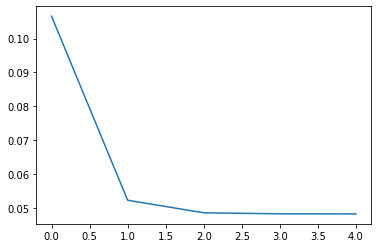

In [54]:
plt.plot(loss_list)